**Example notebook on implementation of tde_spectra_fit**

In [9]:
# import tde_spectra_fit class:

from tde_spectra_fit import TDE_fit # this is the module that does the spectral fitting
from SEM import SEM # this si the module that applies the Barniol Duran model to estimate physical system parameters

Set up your data arrays of the radio observations. In this example we will use data from Alexander et al 2016.

In [2]:


# Example data (from Alexander et al 2016):

flux_density = np.array([2.18, 2.12, 2.13, 2.00, 1.84, 1.56, 1.26, 1.06, 0.84,\
               0.73, 0.59, 0.44, 0.30]) #mJy

u_flux_density_up = np.array([0.08, 0.10, 0.09, 0.05, 0.03, 0.03, 0.03, 0.02, 0.04,\
                 0.02, 0.02, 0.09, 0.04])

u_flux_density_low = u_flux_density_up

frequency = np.array([1.4, 1.5, 1.8, 2.6, 3.4, 5.0, 7.1, 8.5, 11.0, 13.5, 16.0,\
            19.2, 24.5]) #GHz

Initialise the spectral fitting class

In [3]:
S = TDE_fit(fd = flux_density,
        fd_err_low = u_flux_density_low,
        fd_err_up = u_flux_density_up,
        frequency = frequency,
        break_number = 5, # see Granot & Sari 2002, ApJ, 568, 2, Figure 1 for choice of break numbers
        quiescent_flux_density = None,
        name = 'Alexander_2016',
        nsteps = 1000, # number of steps
        nwalkers = 400)

No handles with labels found to put in legend.


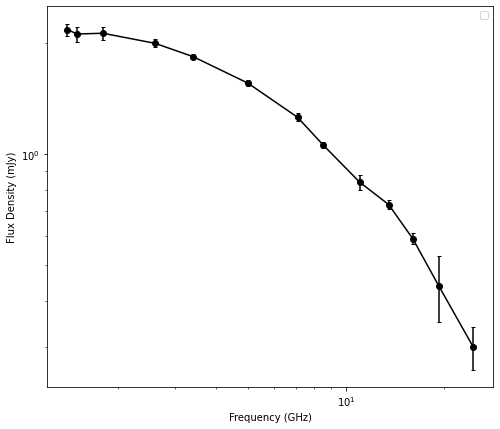

In [4]:
# plot initial data to check all is good:

S.plot_initial_data()

100%|██████████| 1000/1000 [00:21<00:00, 47.09it/s]


(22400, 4)
----------------------------------------------------------
MCMC results:
**Warning** The chain is shorter than 50 times the integrated autocorrelation time for 4 parameter(s). Use this estimate with caution and run a longer chain!
The autocorrelation time is inf. You should run the chains for at least 10 x steps as this.
The MCMC fit parameters are:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

----------------------------------------------------------


/Users/adelle/Documents/TDE_data/spectral_fitting/TDE_spectra/tde_specta_fit/tde_spectra_fit/tde_spectra_fit/tde_spectra_fit.py:301: RuntimeWarning: divide by zero encountered in power
  Fv1 = Fvb * ((v / vb) ** (-beta1 * s) + (v / vb) ** (-beta2 * s)) ** (-1 / s)


----------------------------------------------------------
The peak flux, peak frequency, and p of the spectrum are:
Fp = 2.34 +/- 1.06 mJy
vp = 2.121212 GHz
p = 2.60 +0.15 - 0.12 
----------------------------------------------------------


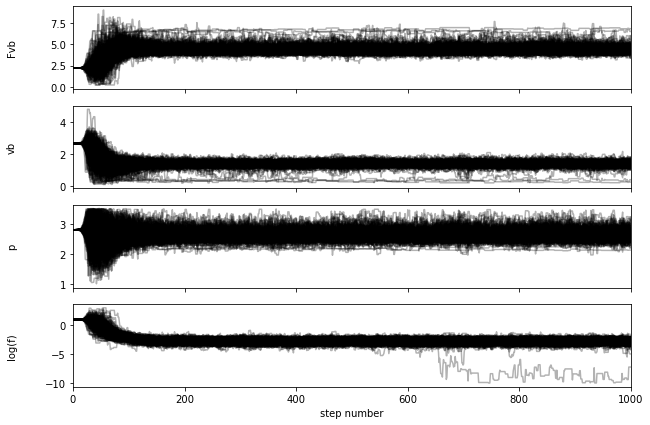

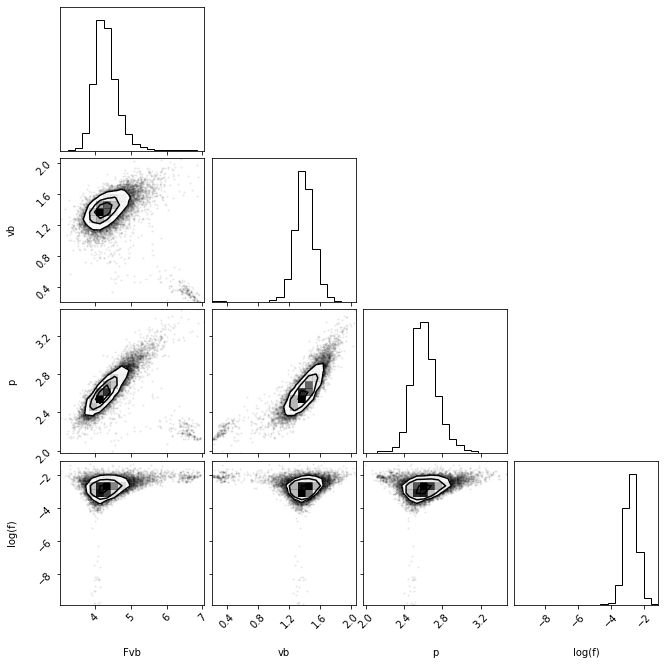

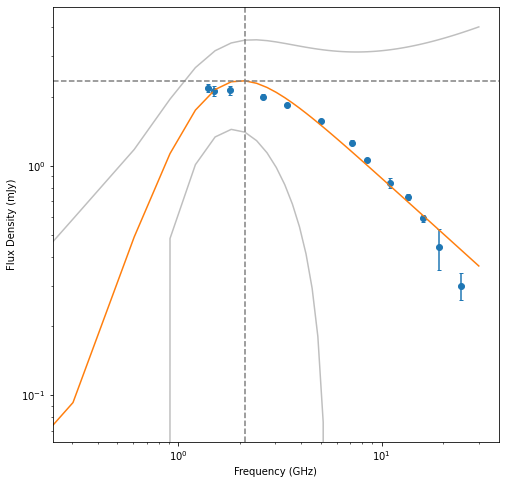

In [10]:
# Looks fine so let's move onto running emcee and analysing the output:

Fvb, vb, p, Fp, vp, Fvb_u, vb_u, p_u, Fp_u = S.do_fit()

Now use the SEM module to calculate the physical jet properties based on this fitted lightcurve

In [11]:
sem = SEM( 
            vp=vp,
            Fvp=Fp,
            p=p,
            dL=96, #luminosity distance
            z=0.022, #redshift
            t=246, #days
            geo='spherical', #options are spherical or conical
            va_gtr_vm=True,
            va=None,
            vm=None,
            save=False,
            name=None,
        )
Eeq, Req = sem.do_analysis()

Assuming spherical geometry..
At time t = 246.0 d
--------------------------------------------------
The energy is: 3.988655566760064e+48 erg
The radius is: 6.0302241780676776e+16 cm
--------------------------------------------------
For this radius and energy, I find:
Ambient density: 0.5209987991170135 cm^-3
Magnetic field: 0.20177037715378143 G
--------------------------------------------------
